In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv('../../dsi_team_22/data/raw/pharma_spending_data.csv')

# Linear Regression: Top 10 Countries

| Country | Slope      | Intercept      | R^2       | RMSE      |
|---------|------------|---------------|-----------|------------|
| USA     | 36.255715  | -71924.079397 | 0.934666  | 44.187307  |
| CAN     | 19.106743  | -37747.293656 | 0.926390  | 69.947414  |
| CHE     | 27.034470  | -53629.006613 | 0.830790  | 109.126560 |
| GRC     | 25.279800  | -50206.614910 | 0.844397  | 88.191235  |
| JPN     | 19.893089  | -39358.579943 | 0.921986  | 54.415433  |
| IRL     | 19.118505  | -37870.946799 | 0.856508  | 92.590336  |
| DEU     | 15.545627  | -30649.255678 | 0.957947  | 43.712980  |
| FRA     | 16.325227  | -32210.923883 | 0.965430  | 34.557731  |
| BEL     | 15.311648  | -30201.892720 | 0.963829  | 40.865402  |
| LUX     | 17.559101  | -34727.829913 | 0.801255  | 52.954206  |

#### Supporting Python Code:


In [2]:
# Define the top 10 countries by their country codes
top_10_countries = ["USA", "CAN", "CHE", "GRC", "JPN", "IRL", "DEU", "FRA", "BEL", "LUX"]   

# Filter the dataset for top 10 countries
top_10_data = df[df['LOCATION'].isin(top_10_countries)]

# Initialize a dictionary to store results
results_t = []

# Loop through each country and fit a linear regression model
for country in top_10_countries:
    # Subset data for the specific country
    country_data = top_10_data[top_10_data['LOCATION'] == country]
    X = country_data[['TIME']]
    y = country_data['USD_CAP']
    
    # Fit linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred = lin_reg.predict(X)
    
    # Evaluate the model
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # Store the results
    results_t.append({
        'Country': country,
        'Slope': lin_reg.coef_[0],
        'Intercept': lin_reg.intercept_,
        'R^2': r2,
        'RMSE': rmse
    })

# Convert the results into a DataFrame for better visualization
results_top_df = pd.DataFrame(results_t)
print(results_top_df)

  Country      Slope     Intercept       R^2        RMSE
0     USA  36.255715 -71924.079397  0.934666   44.187307
1     CAN  19.106743 -37747.293656  0.926390   69.947414
2     CHE  27.034470 -53629.006613  0.830790  109.126560
3     GRC  25.279800 -50206.614910  0.844397   88.191235
4     JPN  19.893089 -39358.579943  0.921986   54.415433
5     IRL  19.118505 -37870.946799  0.856508   92.590336
6     DEU  15.545627 -30649.255678  0.957947   43.712980
7     FRA  16.325227 -32210.923883  0.965430   34.557731
8     BEL  15.311648 -30201.892720  0.963829   40.865402
9     LUX  17.559101 -34727.829913  0.801255   52.954206


### Data Visualization using Matplotlib

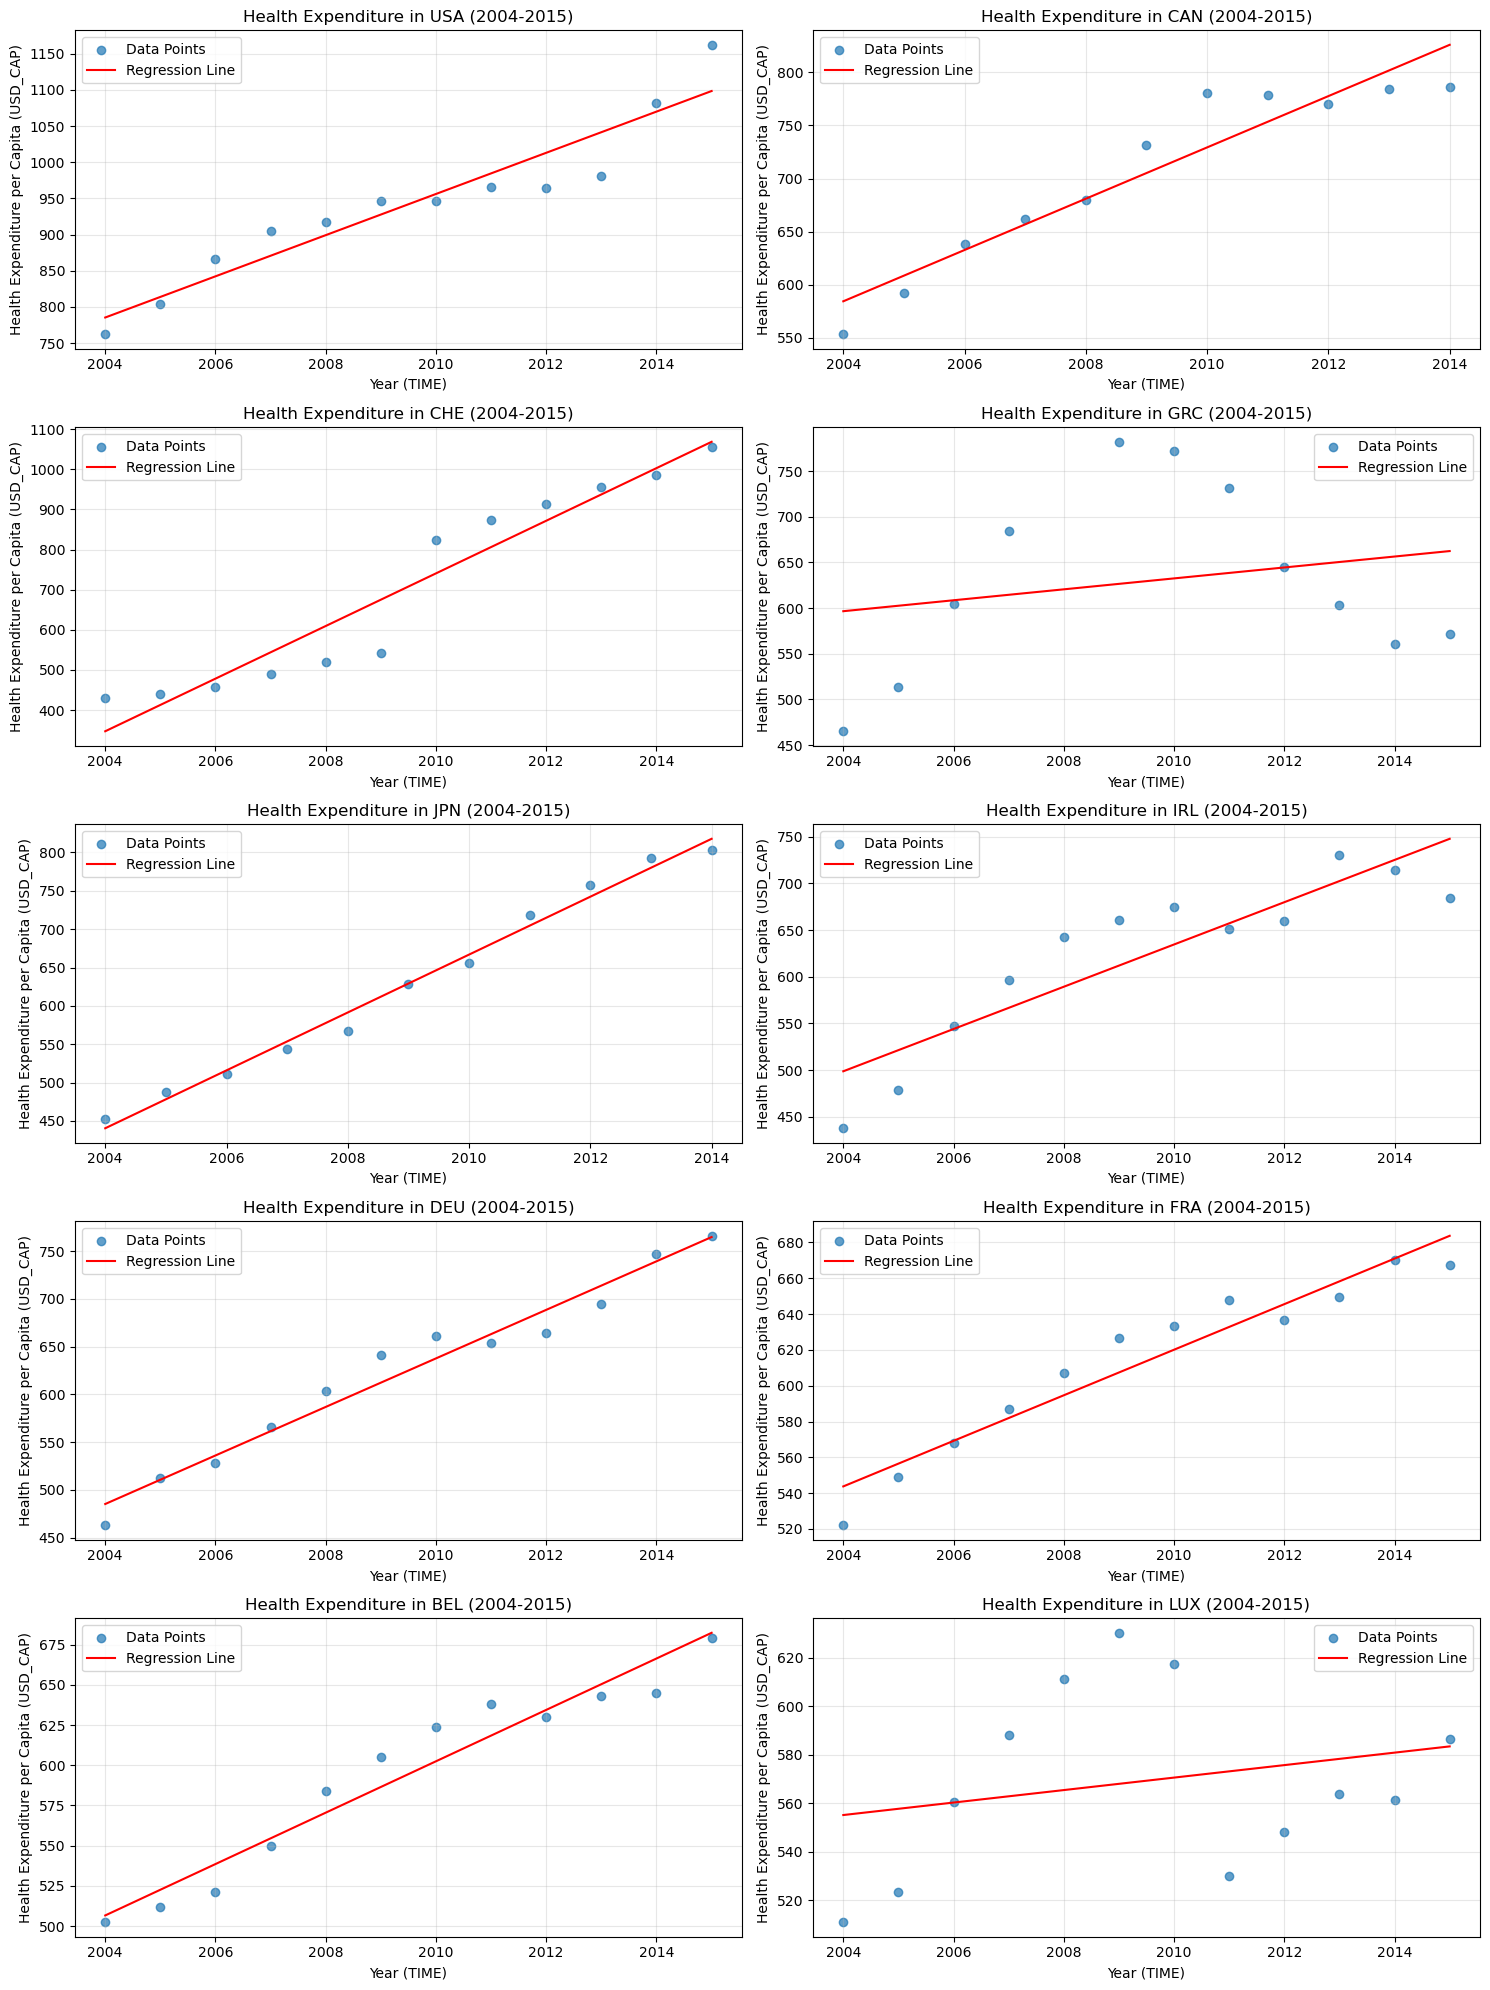

In [3]:
# Filter dataset for years between 2004 and 2015
filtered_data = top_10_data[(top_10_data['TIME'] >= 2004) & (top_10_data['TIME'] <= 2015)]

# Set up the figure for subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()  # Flatten axes array for easier indexing

# Loop through each country and create a plot
for i, country in enumerate(top_10_countries):  # Use bottom_10_countries
    # Subset data for the specific country and apply the filter
    country_data = filtered_data[filtered_data['LOCATION'] == country]
    X = country_data[['TIME']]
    y = country_data['USD_CAP']
    
    # Fit linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred = lin_reg.predict(X)
    
    # Plot the data points and regression line
    ax = axes[i]
    ax.scatter(X, y, label="Data Points", alpha=0.7)
    ax.plot(X, y_pred, color='red', label="Regression Line")
    ax.set_title(f"Health Expenditure in {country} (2004-2015)")
    ax.set_xlabel("Year (TIME)")
    ax.set_ylabel("Health Expenditure per Capita (USD_CAP)")
    ax.legend()
    ax.grid(alpha=0.3)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


# Linear Regression: Bottom 10 Countries

| Country | Slope      | Intercept      | R^2       | RMSE       |
|---------|------------|---------------|-----------|------------|
| LVA     | 16.827000  | -33542.514000 | 0.917322  | 17.438811  |
| EST     | 15.733958  | -31350.668199 | 0.991370  | 7.191712   |
| ISR     | 9.897940   | -19615.120012 | 0.969989  | 3.989180   |
| MEX     | 12.593083  | -25042.122250 | 0.691426  | 41.214005  |
| POL     | 11.751007  | -23310.086029 | 0.945879  | 11.330967  |
| DNK     | 9.655551   | -19088.734866 | 0.976300  | 15.628020  |
| LTU     | 23.322640  | -46493.009216 | 0.981652  | 11.007112  |
| CZE     | 13.955228  | -27653.992985 | 0.942963  | 25.741312  |
| NOR     | 11.556348  | -22830.435423 | 0.944040  | 38.165817  |
| NLD     | 11.227991  | -22170.146239 | 0.940032  | 37.204153  |

#### Supporting Python Code:

In [4]:
# Define the bottom 10 countries by their country codes
bottom_10_countries = ['LVA', 'EST', 'ISR', 'MEX', 'POL', 'DNK', 'LTU', 'CZE', 'NOR', 'NLD']

# Filter the dataset for bottom 10 countries
bottom_10_data = df[df['LOCATION'].isin(bottom_10_countries)]

# Initialize a dictionary to store results
results_b = []

# Loop through each country and fit a linear regression model
for country in bottom_10_countries:
    # Subset data for the specific country
    country_data = bottom_10_data[bottom_10_data['LOCATION'] == country]
    X = country_data[['TIME']]
    y = country_data['USD_CAP']
    
    # Fit linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred = lin_reg.predict(X)
    
    # Evaluate the model
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # Store the results
    results_b.append({  # Corrected to `results_b` instead of `results_t`
        'Country': country,
        'Slope': lin_reg.coef_[0],
        'Intercept': lin_reg.intercept_,
        'R^2': r2,
        'RMSE': rmse
    })

# Convert the results into a DataFrame for better visualization
results_bottom_df = pd.DataFrame(results_b)
print(results_bottom_df)


  Country      Slope     Intercept       R^2       RMSE
0     LVA  16.827000 -33542.514000  0.917322  17.438811
1     EST  15.733958 -31350.668199  0.991370   7.191712
2     ISR   9.897940 -19615.120012  0.969989   3.989180
3     MEX  12.593083 -25042.122250  0.691426  41.214005
4     POL  11.751007 -23310.086029  0.945879  11.330967
5     DNK   9.655551 -19088.734866  0.976300  15.628020
6     LTU  23.322640 -46493.009216  0.981652  11.007112
7     CZE  13.955228 -27653.992985  0.942963  25.741312
8     NOR  11.556348 -22830.435423  0.944040  38.165817
9     NLD  11.227991 -22170.146239  0.940032  37.204153


### Data Visualization using Matplotlib

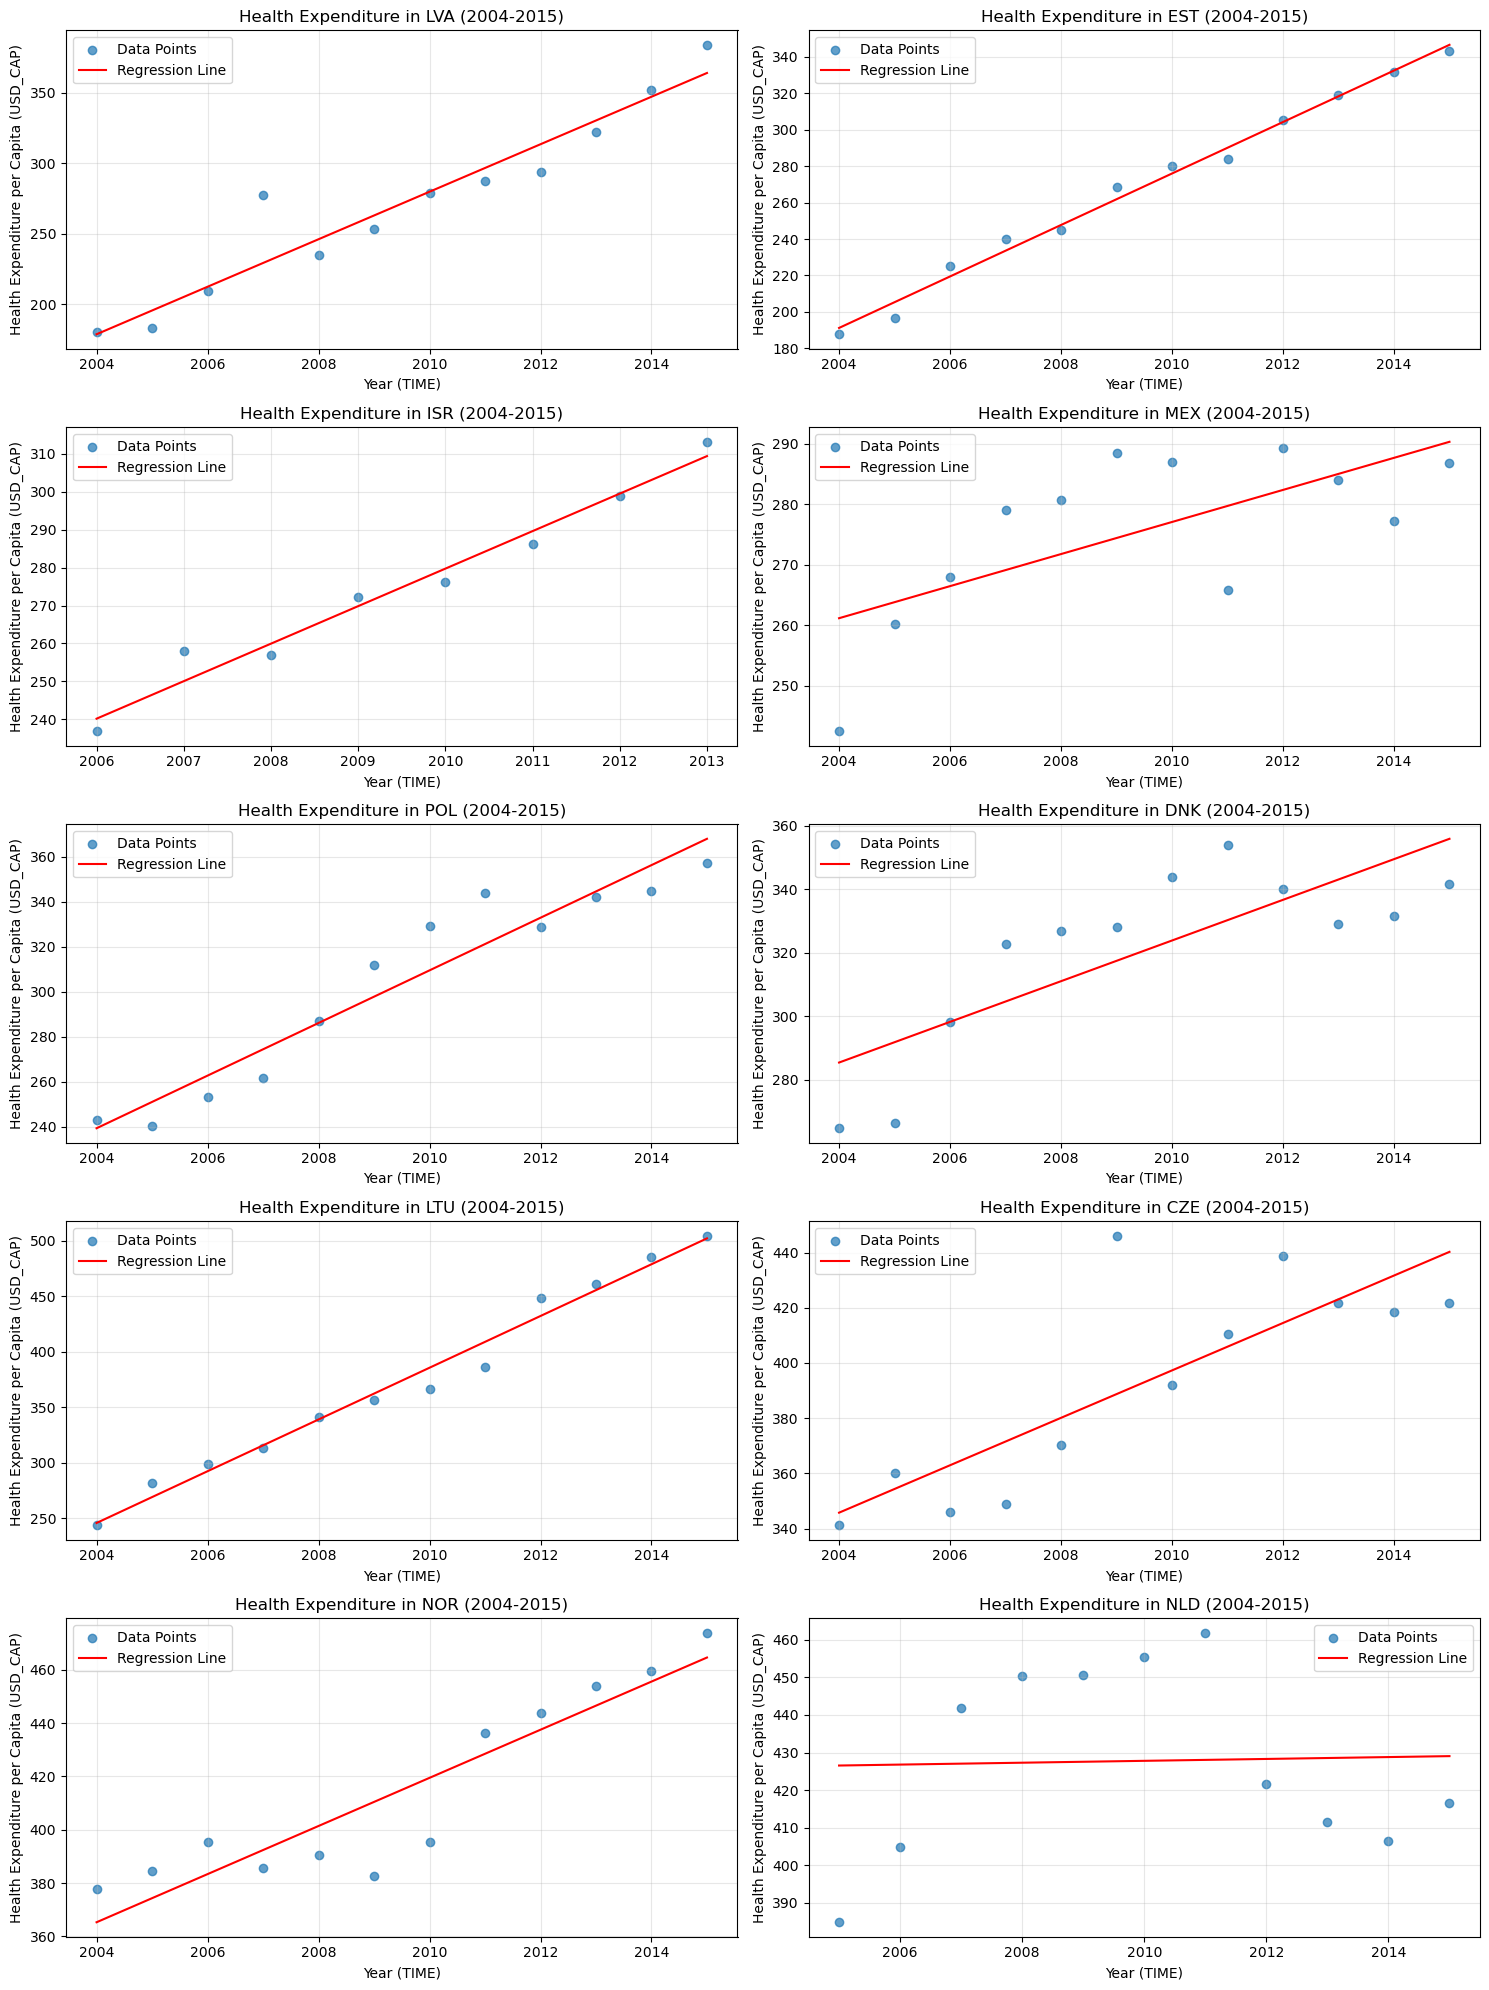

In [5]:
# Filter dataset for years between 2004 and 2015
filtered_data = bottom_10_data[(bottom_10_data['TIME'] >= 2004) & (bottom_10_data['TIME'] <= 2015)]

# Set up the figure for subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()  # Flatten axes array for easier indexing

# Loop through each country and create a plot
for i, country in enumerate(bottom_10_countries):  # Use bottom_10_countries
    # Subset data for the specific country and apply the filter
    country_data = filtered_data[filtered_data['LOCATION'] == country]
    X = country_data[['TIME']]
    y = country_data['USD_CAP']
    
    # Fit linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred = lin_reg.predict(X)
    
    # Plot the data points and regression line
    ax = axes[i]
    ax.scatter(X, y, label="Data Points", alpha=0.7)
    ax.plot(X, y_pred, color='red', label="Regression Line")
    ax.set_title(f"Health Expenditure in {country} (2004-2015)")
    ax.set_xlabel("Year (TIME)")
    ax.set_ylabel("Health Expenditure per Capita (USD_CAP)")
    ax.legend()
    ax.grid(alpha=0.3)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()
